# Stephen Curry's 2022-2023 NBA season shooting<br>
By: Ellycea Burke<br>
Student Number: 100932780

## Introduction
Stephen Curry has been one of the most influential players of this generation not only for the NBA (National Basketball Association), but for the entire game of basketball across the glode. He is arguably the best shooter in NBA history, revolutionizing the three-point shot and becoming the all-time leader in three-pointers made. A record he broke back in 2021. In this assignment, I will examine all the shots taken by Stephen Curry during the 2022-2023 NBA season (playoffs included). The data I will be looking at includes information on where he took his shots from, the result of his shot and in what quarter that shot was taken. I want to determine in which quarter he is most efficient in his shooting and if his two-point shooting is as efficient as his three-point shooting, which he is highly recognized for. This dataset does not include any free throws he had taken during the season. 

<img src = 'https://www.mercurynews.com/wp-content/uploads/2016/08/20140213__curryjumpshot7-1.jpg?w=600'>

## Methods
### Data Collection

In [79]:
# Importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
# Importing the dataset
file = '3_stephen_curry_shot_chart_2023.csv'
curry = pd.read_csv(file)


### Cleaning data
I changed two columns in the dataset to make it easier to understand. I also changed the scoring result from a boolean to an integer for mathematical purposes. 0 is False and 1 is true. I got rid of some columns that I felt were not important in my analysis, to make the data easier to work with and read. I solely wanted to examine the shots taken during regulation time, therefore I eliminated all the shots taken in overtime. Fortunatly, the dataset had no instances of missing data.

In [82]:
# Deleting columns for easier use
del curry['color']
del curry['season']
del curry['team']
del curry['top']
del curry['left']

# Changing column heading 'result' to 'scored'
curry.columns = ['date', 'qtr','time_remaining', 'scored', 'points', 'distance_ft', 'lead', 'lebron_team_score', 'opponent_team_score', 'opponent']

# Replacing scored boolean to integer value
curry = curry.replace({'scored': {True : 1 , False: 0}})

# Dropping all the shots taken in overtime
curry= curry.drop(curry[curry['qtr']=='1st OT'].index)

## Analysis

### Overall shooting
I will begin by examining Stephen Curry's overall shooting for the entire season. Figure 1 shows that he took more three-point shots than he did two-point shots the entire season.

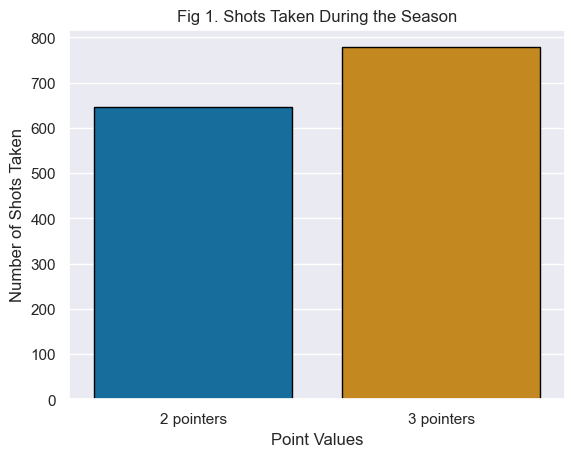

In [84]:
# Grouping shots made and shots taken from each point value
shots = curry['scored'].groupby(curry['points']).size().to_frame()

# Changing index names for more clarity
shots.index = ['2 pointers', '3 pointers']

# Data Visualization
p = sns.barplot(data=shots, x=shots.index,y='scored',palette='colorblind', edgecolor='black')
plt.title('Fig 1. Shots Taken During the Season')
plt.xlabel('Point Values')
plt.ylabel('Number of Shots Taken')
plt.show()


However, in figure 2 it shows that he actually made more of his two-point shots than his three-point shots during the season. 

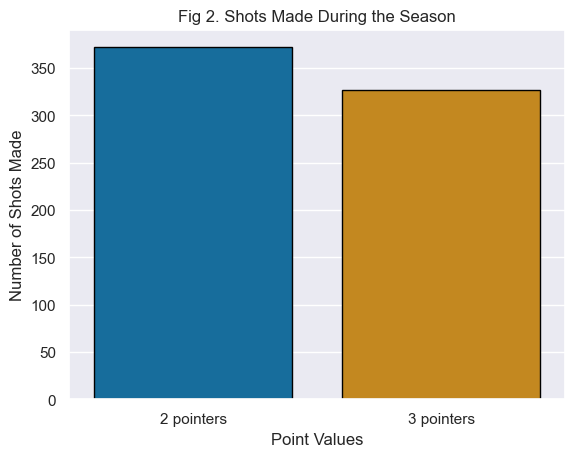

In [86]:
# Grouping to get only shots made during the season
hits = curry['scored'].groupby(curry['points']).sum().to_frame()

# Changing index names for more clarity
hits.index = ['2 pointers', '3 pointers']

# Data Visualization
p = sns.barplot(data=hits, x=hits.index,y='scored',palette='colorblind', edgecolor='black')
plt.title('Fig 2. Shots Made During the Season')
plt.xlabel('Point Values')
plt.ylabel('Number of Shots Made')
plt.show()


I grouped all the shots he took each game and added the total number of shots taken each game to the grouped dataframe. During the season he averaged 20.6 shots per game. He averaged more three-point shots per game than he did two-point shots. 

In [87]:
# Grouping to get shots taken each game 
shots_by_date = curry['points'].groupby([curry['date'],curry['points']]).size().unstack()

# Adding a new column to add the three point and two point shots to total shots taken 
shots_by_date['total shots'] = shots_by_date[2]+shots_by_date[3]

print(f'Average number of shots taken per game: {round(shots_by_date["total shots"].mean(),1)} shots')
print(f'Average number two-point shots taken per game: {round(shots_by_date[2].mean(),1)} shots')
print(f'Average number of three-point shots taken per game: {round(shots_by_date[3].mean(),1)} shots')


Average number of shots taken per game: 20.6 shots
Average number two-point shots taken per game: 9.4 shots
Average number of three-point shots taken per game: 11.3 shots


Figure 3 shows the percentage of games where he took a number of shots in a certain range value. 

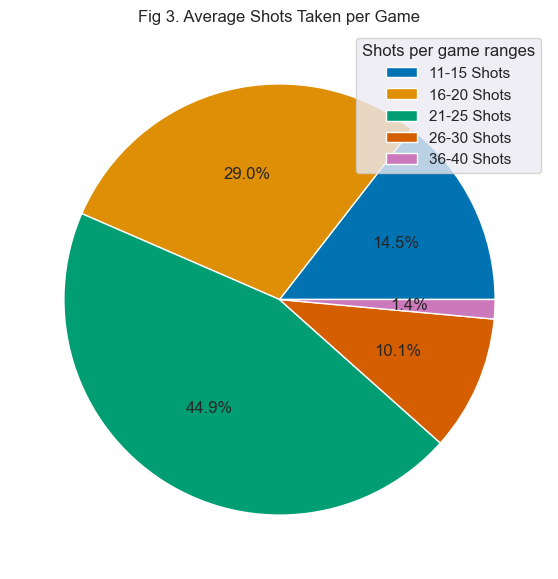

In [98]:
# I got the max and min values for the dataframe indexing, so to not have excess rows
shots_by_date['total shots'].max()
shots_by_date['total shots'].min()

# I created a new dataframe to store the sum of games for the range values
p = pd.DataFrame(index = ['11-15 Shots','16-20 Shots','21-25 Shots','26-30 Shots','31-35 Shots','36-40 Shots'],columns=['number of games'])

# I got each total for the ranges and added them to their index in the dataframe
p.loc['11-15 Shots'] = shots_by_date['total shots'][(shots_by_date['total shots'] >=11) & (shots_by_date['total shots'] <=15)].count()
p.loc['16-20 Shots'] = shots_by_date['total shots'][(shots_by_date['total shots'] >=16) & (shots_by_date['total shots'] <=20)].count()
p.loc['21-25 Shots'] = shots_by_date['total shots'][(shots_by_date['total shots'] >=21) & (shots_by_date['total shots'] <=25)].count()
p.loc['26-30 Shots'] = shots_by_date['total shots'][(shots_by_date['total shots'] >=26) & (shots_by_date['total shots'] <=30)].count()
p.loc['31-35 Shots'] = shots_by_date['total shots'][(shots_by_date['total shots'] >=31) & (shots_by_date['total shots'] <=35)].count()
p.loc['36-40 Shots'] = shots_by_date['total shots'][(shots_by_date['total shots'] >=36) & (shots_by_date['total shots'] <=40)].count()

# After looking at the dataframe, this total was 0 so I dropped it for graphing purposes
p=p.drop('31-35 Shots')

# Data Visualization
sns.set_style("whitegrid")
sns.set_theme(palette='colorblind')
plt.figure(figsize=(7,7))
plt.pie(p['number of games'], autopct='%1.1f%%', wedgeprops={'linewidth':1, 'edgecolor':'white'})
plt.legend(title='Shots per game ranges', labels=p.index, loc='upper right')
plt.title('Fig 3. Average Shots Taken per Game')
plt.show()


### Shooting by Quarter
Next, I will examine in which quarter Curry took most of his shots from and where (point value on the court) he was taking most of these shots from. Figure 4 shows the number of shots taken each quarter grouped by point value, it shows he took more three-point shots than two-point shots each quarter.

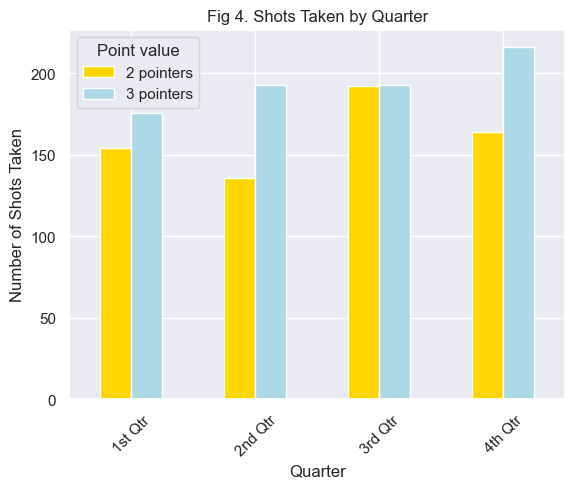

In [89]:
taken_by_quarter = curry['scored'].groupby([curry['qtr'],curry['points']]).size()
taken_by_quarter = taken_by_quarter.unstack()
taken_by_quarter.plot(kind='bar', stacked=False, color=['gold','lightblue'], title='Fig 4. Shots Taken by Quarter')
plt.xlabel('Quarter')
plt.xticks(rotation = 45)
plt.ylabel('Number of Shots Taken')
plt.legend(title = 'Point value', labels=['2 pointers', '3 pointers'])
plt.show()


Figure 5 shows the number of shots made each quarter and and the amount at each point value.

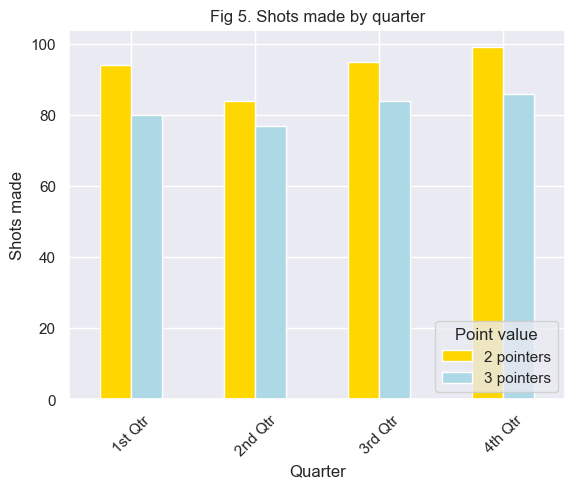

In [75]:
# Grouping where he hit most of his shots per quarter
hits_by_quarter = curry['scored'].groupby([curry['qtr'],curry['points']]).sum()
hits_by_quarter = hits_by_quarter.unstack()

# Data Visualization
hits_by_quarter.plot(kind='bar', stacked=False, color=['gold','lightblue'], title='Fig 5. Shots made by quarter')
plt.xlabel('Quarter')
plt.xticks(rotation = 45)
plt.ylabel('Shots made')
plt.legend(title = 'Point value', labels=['2 pointers', '3 pointers'], loc='lower right')
plt.show()


The table below shows Curry's percentage from each point value during the season. It indicates that his two-point shot percentages are higher than his three-point percentage in every quarter. 

In [78]:
# Getting the number of shots taken by quarter for the season
by_quarter = curry['scored'].groupby([curry['qtr'],curry['points']]).mean().unstack()

# Getting percentage value
by_quarter=(by_quarter*100).round(1)
display(by_quarter)

points,2,3
qtr,,
1st Qtr,61.0,45.5
2nd Qtr,61.8,39.9
3rd Qtr,49.5,43.5
4th Qtr,60.4,39.8


## Discussion
In this assignment I explored a dataset containing all the shots taken by Stephen Curry during the 2022-2023 NBA season. After exploring the data I have answered the questions I set out to explore. During the 2022-2023 NBA season, the data shows that Curry shot the two-point shot at a higher success rate than he did the three-point shot, this is true for each quarter of the game and on the overall season. Dispite the fact he averaged more three-point shots per game and took more three-point shots on the entire season. Most of his made shots came in the fourth quarter, but most of his shots taken were in the third quarter. However, his two-point shot percentage was the highest in the second quarter and his three-point shooting percentage was the highest in the first quarter. From this data I can conclude that Stehen Curry's mid-range game (his two-point shooting) is just as good as his three-point game. He is recongnized for his impact and revolution of the three-point shot; however his efficeny at shooting the two-point shot should be acknowleged as well. In every quarter in the 2022-2023 season his two-point shooting percentage success rate was higher than that of his three-point percentage. Furthermore, he had more success shooting in games' first halves than their second for the season.

## References
Source data - https://www.kaggle.com/datasets/dhavalrupapara/nba-2023-player-shot-dataset/data?select=3_stephen_curry_shot_chart_2023.csv<br>
Pandas for data manipulation<br>
Seaborn for data visulaization and graphing<br>
Matplotlib for data visulization and graphing<br>
Image source - https://www.mercurynews.com/wp-content/uploads/2016/08/20140213__curryjumpshot7-1.jpg?w=600